# Les SVM : première rencontre

## 1 - Cas linéaire

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- Simuler un ensemble d’entraînement de dimension 2 linéairement séparable, c'est-à-dire que l'on peut séparer par une droite. Il devra être composé de 100 observations avec 2 caractéristiques chacune (*indication : on peut prendre par exemple y=1 pour x1 > 0.5*)
- Afficher cet ensemble en colorant par label.

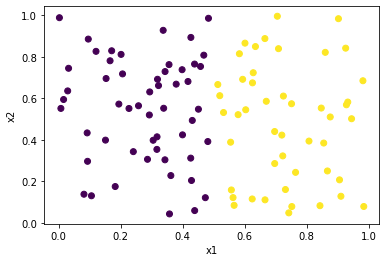

In [9]:
np.random.seed(123)
X = np.random.rand(100,2)
y = X[:,0] > 0.5
#data = np.concatenate((X, y.reshape(100,1)), axis=1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('x1')
plt.ylabel('x2');

- Entrainer un classifieur SVM linéaire (LinearSVC) et calculer l'accuracy

In [3]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X,y)
print(f'{svc.score(X,y)=}')

svc.score(X,y)=0.99


- Faire varier le paramètre C pour voir son effet sur le modèle 

In [4]:
for C in [10**k for k in range(-4,3)]:
    svc = LinearSVC(C=C, max_iter=10000)
    svc.fit(X,y)
    print(f'pour {C=} on a {svc.score(X,y)=}')

pour C=0.0001 on a svc.score(X,y)=0.93
pour C=0.001 on a svc.score(X,y)=0.93
pour C=0.01 on a svc.score(X,y)=0.91
pour C=0.1 on a svc.score(X,y)=0.96
pour C=1 on a svc.score(X,y)=0.99
pour C=10 on a svc.score(X,y)=1.0
pour C=100 on a svc.score(X,y)=1.0


- Faire un graphique avec l'ensemble de décision en utilisant une fonction `frontiere` à définir (le graphique doit donc représenter les points et les 2 espaces séparés par la frontière de décision)

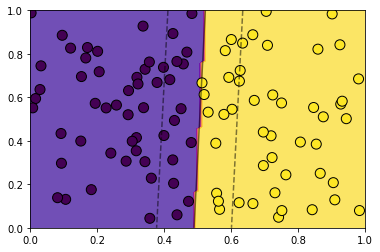

In [13]:
from utils import frontiere

svc = LinearSVC(C=10)
svc.fit(X,y)

frontiere(svc, supp_vect=False)
plt.scatter(X[:,0], X[:,1], c=y, s=100, edgecolor='black');

- Sur cet ensemble, ajouter du bruit aux y (par exemple avec une probabilité p, yi = 1-yi)
- Afficher l'ensemble, entrainer un SVM linéaire (LinearSVC) et faire varier le paramètre C.

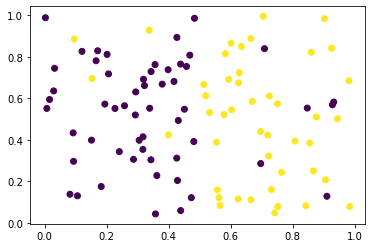

In [14]:
np.random.seed(123)
X = np.random.rand(100,2)
y = X[:,0] > 0.5

# o, choisit 10 observations au hasard pour lesquelles on va inverser y
obs_bruit = np.random.choice(range(len(y)),10)
y[obs_bruit] = 1 - y[obs_bruit]

plt.scatter(X[:,0], X[:,1], c=y);

In [15]:
for C in [10**k for k in range(-4,3)]:
    svc = LinearSVC(C=C, max_iter=10000)
    svc.fit(X,y)
    print(f'pour {C=} on a {svc.score(X,y)=}')

pour C=0.0001 on a svc.score(X,y)=0.56
pour C=0.001 on a svc.score(X,y)=0.58
pour C=0.01 on a svc.score(X,y)=0.76
pour C=0.1 on a svc.score(X,y)=0.87
pour C=1 on a svc.score(X,y)=0.87
pour C=10 on a svc.score(X,y)=0.86
pour C=100 on a svc.score(X,y)=0.84


# 2- Cas non linéaire : 

- Générer des données d'entrainement non linéairement séparable puis les afficher avec les couleurs. On peut utiliser : 
>- from sklearn.datasets import make_moons 
>- X, y = make_moons(noise = 0.1)

- Générer de la même manière un échantillon de données de test

- Entraîner un SVM avec les différents noyaux possibles et avec différentes valeurs de $C$.

## 3. Une petite application sur les données de digits 

- Charger le jeu de données digits disponible dans sklearn
>- utiliser la fonction load_digits
>- regarder ce que contient le dataset
>- enregistrer les images dans une variables images
>- créer la matrice X à l'aide d'un reshape
>- créer le vecteur y à partir de l'attribut targets du dataset
- Afficher 8 images prises au hasard dans le jeu de données

- Découper le dataset en échantillons d'entraînement et de test
- Entrainer un kNN, une régression logistique et un SVM
- Comparer ces modèles
- Utiliser GridSearchCV pour affiner le choix des hyperparamètres